Был выбран датасет ["Student exam score dataset analysis"](https://www.kaggle.com/datasets/grandmaster07/student-exam-score-dataset-analysis)

<u>Предметная область</u>: образование

<u>Источник данных</u>: датасет собран из открытых датасетов доступных на Kaggle и UCI Machine Learning Repository

<u>Характер данных</u>: реальные

__Атрибуты, представленный в датасете__:
- student_id: строковый, id-ключ каждого студента
- hours_studied: числовой, часы обучения
- sleep_hours: числовой, сколько студент спит
- attendance_percent: числовой, процент посещаемости
- previous_scores: числовой, оценка предыдущего экзамена
- exam_score: числовой, оценка текущего экзамена

__Здача анализа__: выявить корреляцию между оценкой за экзамен и остальными атрибутами:)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [3]:
df = pd.read_csv('student_exam_scores.csv')

In [9]:
hours_studied_mid = df['hours_studied'].mean()
hours_studied_sd = df['hours_studied'].std()

sleep_hours_mid = df['sleep_hours'].mean()
sleep_hours_sd = df['sleep_hours'].std()

attendance_percent_mid = df['attendance_percent'].mean()
attendance_percent_sd = df['attendance_percent'].std()

previous_scores_mid = df['previous_scores'].mean()
previous_scores_sd = df['previous_scores'].std()

exam_score_mid = df['exam_score'].mean()
exam_score_sd = df['exam_score'].std()

print(f'Часы обучения: среднее = {hours_studied_mid}, СКО = {hours_studied_sd}')
print(f'Кол-во часов на сон: среднее = {sleep_hours_mid}, СКО = {sleep_hours_sd}')
print(f'Процент посещаемости: среднее = {attendance_percent_mid}, СКО = {attendance_percent_sd}')
print(f'Оценка за предыдущий экзамен: среднее = {previous_scores_mid}, СКО = {previous_scores_sd}')
print(f'Оценка за текущий экзамен: среднее = {exam_score_mid}, СКО = {exam_score_sd}')

Часы обучения: среднее = 6.3255, СКО = 3.2273174058637237
Кол-во часов на сон: среднее = 6.621999999999999, СКО = 1.497138308767059
Процент посещаемости: среднее = 74.83, СКО = 14.249905227578703
Оценка за предыдущий экзамен: среднее = 66.8, СКО = 15.66386874049952
Оценка за текущий экзамен: среднее = 33.955, СКО = 6.789548204712932


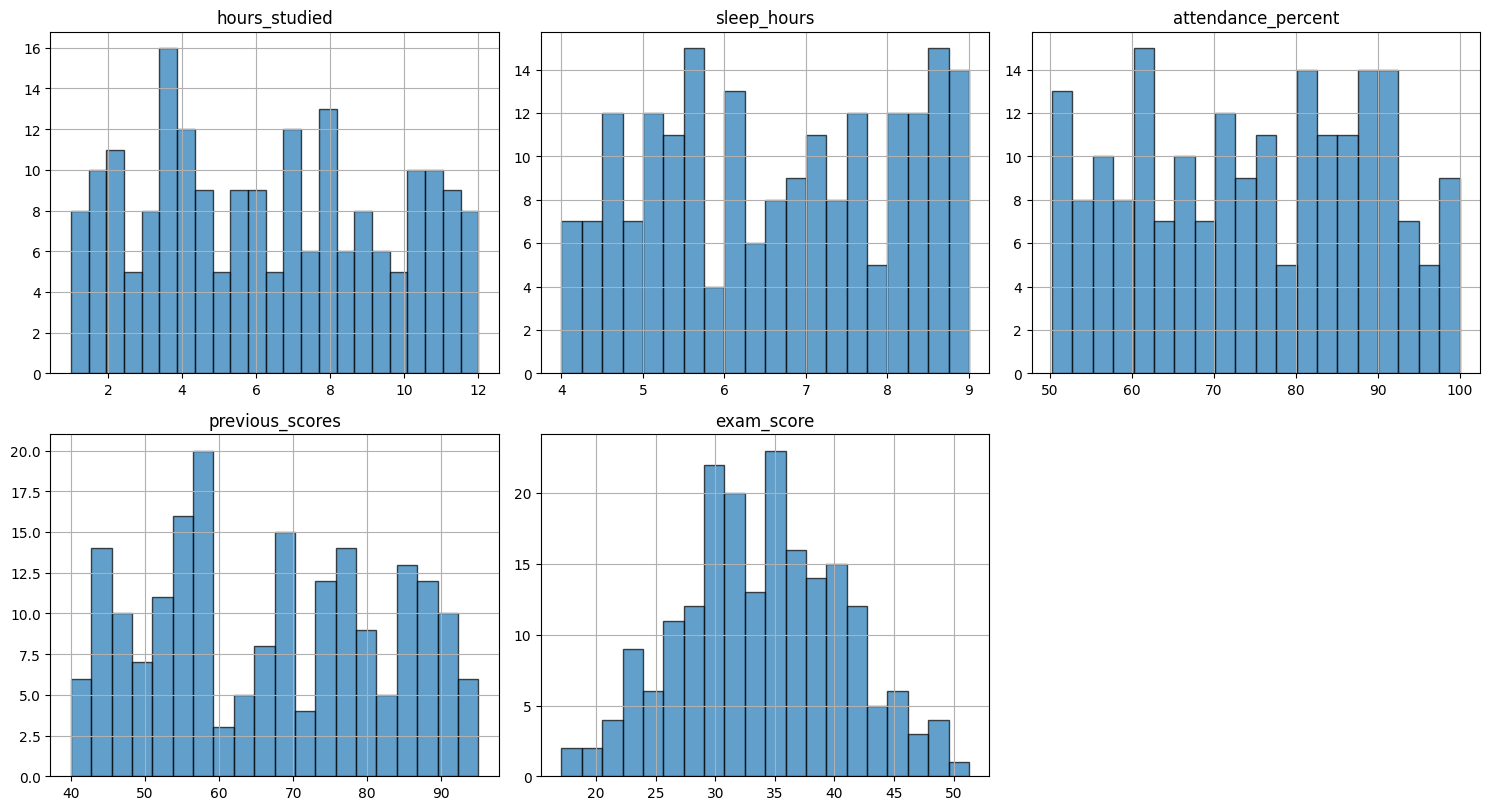

In [12]:
bins_config = {
    'hours_studied': 23,  
    'sleep_hours': 20,
    'attendance_percent':20,
    'previous_scores': 20,
    'exam_score': 20,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

columns = [
    'hours_studied', 'sleep_hours', 'attendance_percent',
    'previous_scores', 'exam_score'
]

for i, col in enumerate(columns):
    if col in bins_config:
        bins = bins_config[col]
        df[col].hist(bins=bins, ax=axes[i], edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        
        if isinstance(bins, range):
            axes[i].set_xticks(list(bins)[1:])
    
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Для обнаружения выбросов буду использовать метод IQR

In [11]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (data < lower_bound) | (data > upper_bound)


hours_studied_out = detect_outliers_iqr(df['hours_studied'])
sleep_hours_out = detect_outliers_iqr(df['sleep_hours'])
attendance_percent_out = detect_outliers_iqr(df['attendance_percent'])
previous_scores_out = detect_outliers_iqr(df['previous_scores'])
exam_score_out = detect_outliers_iqr(df['exam_score'])

print(f'Кол-во выбросов в hours_studied = {sum(hours_studied_out)}')
print(f'Кол-во выбросов в sleep_hours = {sum(sleep_hours_out)}')
print(f'Кол-во выбросов в attendance_percent = {sum(attendance_percent_out)}')
print(f'Кол-во выбросов в previous_scores = {sum(previous_scores_out)}')
print(f'Кол-во выбросов в exam_score = {sum(exam_score_out)}')   

Кол-во выбросов в hours_studied = 0
Кол-во выбросов в sleep_hours = 0
Кол-во выбросов в attendance_percent = 0
Кол-во выбросов в previous_scores = 0
Кол-во выбросов в exam_score = 0


__Выбросов нет.__

__Пропущенных значений нет__

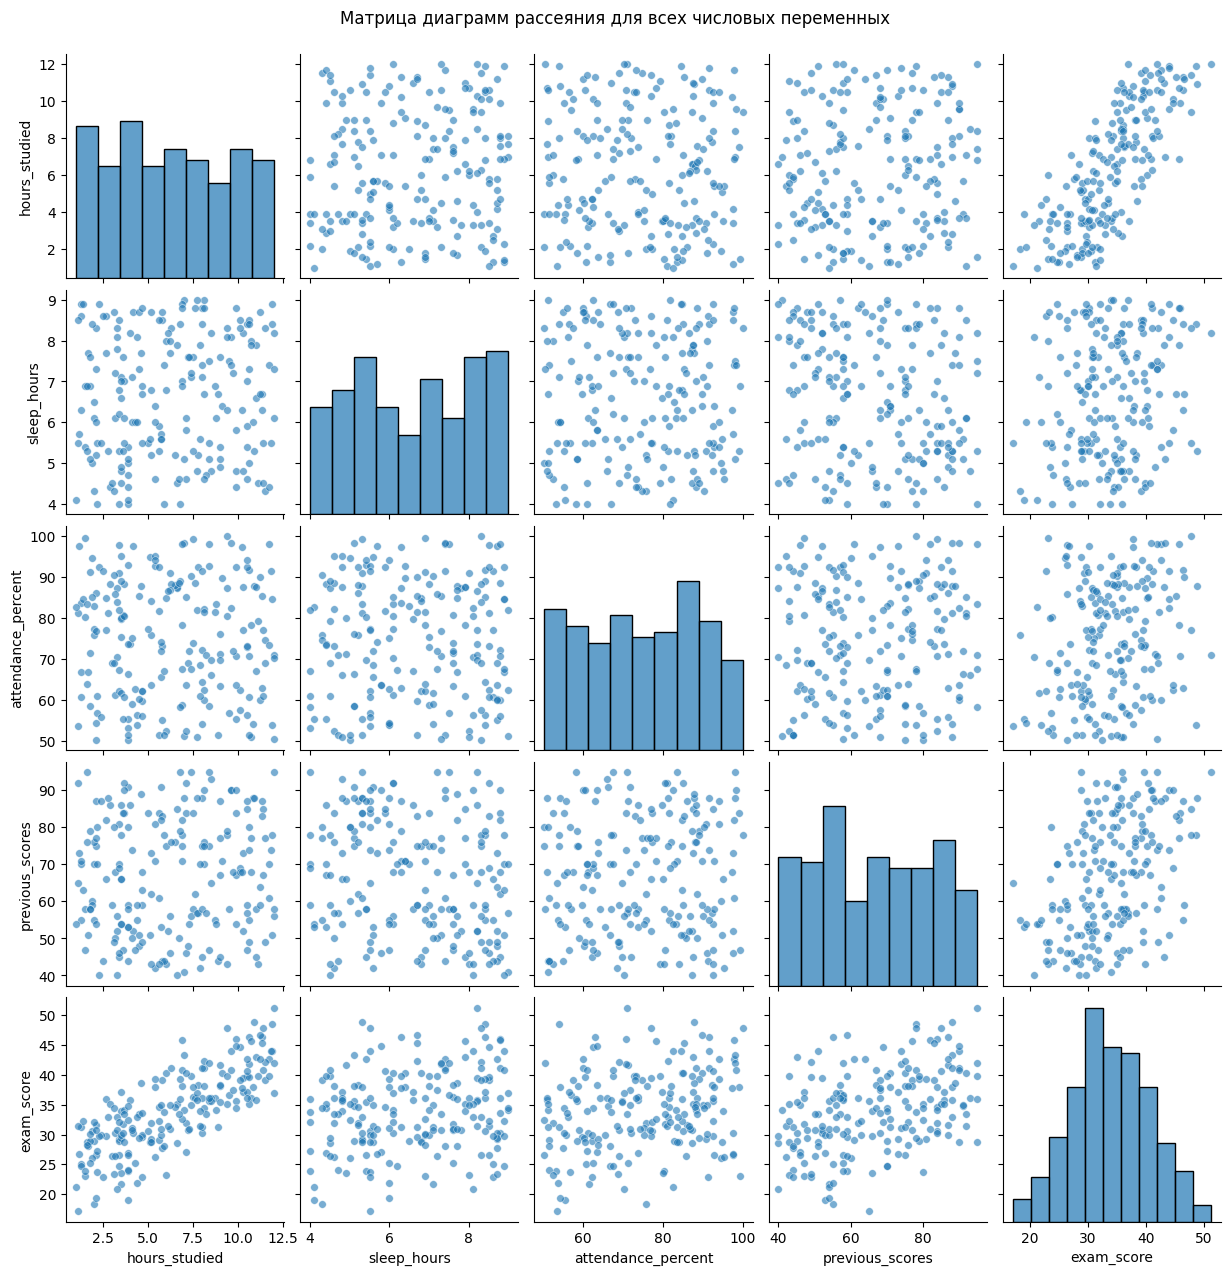

In [13]:

numeric_columns = [
    'hours_studied', 'sleep_hours', 'attendance_percent',
    'previous_scores', 'exam_score'
]


sns.pairplot(df[numeric_columns], 
             diag_kind='hist',
             plot_kws={'alpha': 0.6, 's': 30},
             diag_kws={'alpha': 0.7})
plt.suptitle('Матрица диаграмм рассеяния для всех числовых переменных', y=1.02)
plt.show()

Корреляцию можно проследить на следующих парах:
- часы обучения - оценка текущего экзамена
- сколько студент спит - оценка текущего экзамена
- процент посещаемости - оценка текущего экзамена
- оценка предыдущего экзамена - оценка текущего экзамена

Рассмотрим эти графики подробнее

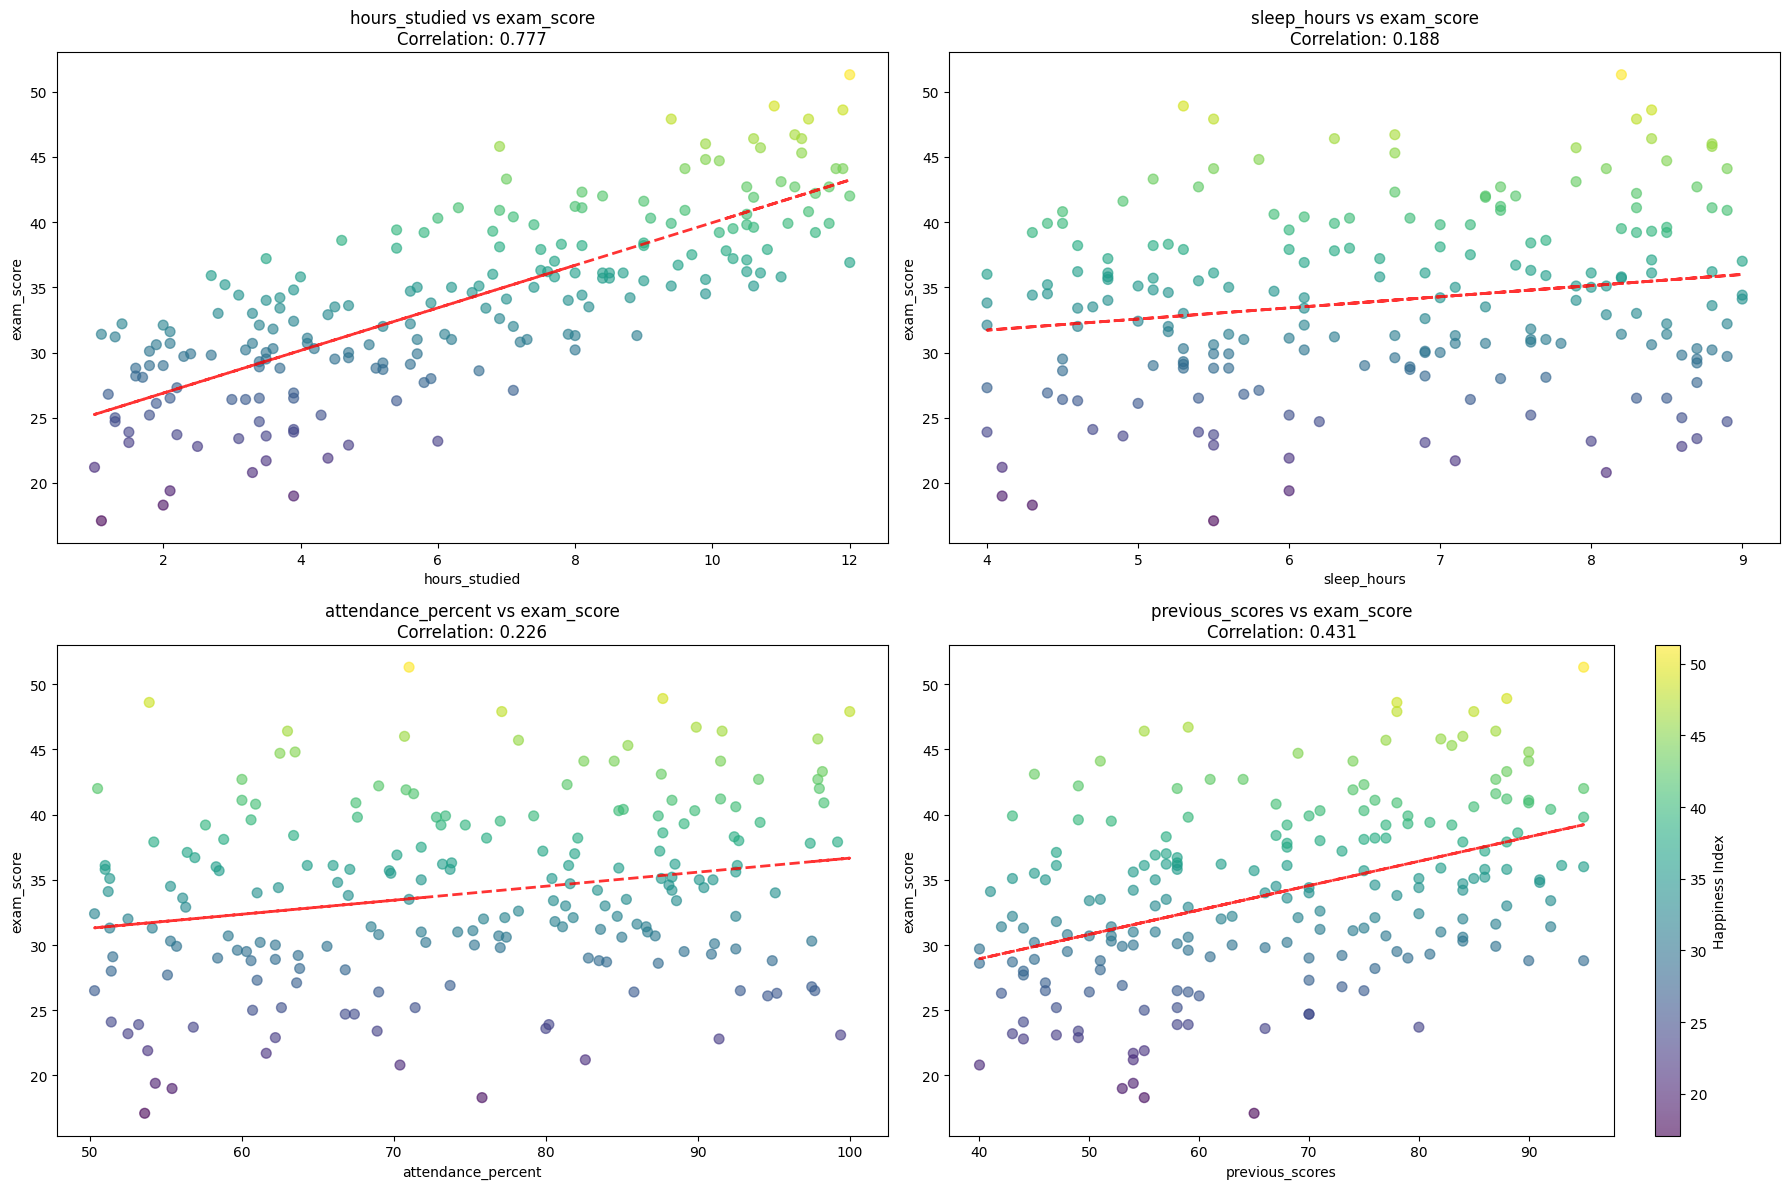

In [16]:
key_pairs = [
    ('hours_studied', 'exam_score'),
    ('sleep_hours', 'exam_score'),
    ('attendance_percent', 'exam_score'),
    ('previous_scores', 'exam_score'),
]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(key_pairs):
    scatter = axes[i].scatter(df[x_col], df[y_col], alpha=0.6, c=df['exam_score'], 
                             cmap='viridis', s=50)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    
    z = np.polyfit(df[x_col], df[y_col], 1)
    p = np.poly1d(z)
    axes[i].plot(df[x_col], p(df[x_col]), "r--", alpha=0.8, linewidth=2)
    
    corr = df[x_col].corr(df[y_col])
    axes[i].set_title(f'{x_col} vs {y_col}\nCorrelation: {corr:.3f}')
    
    if i == len(key_pairs) - 1:
        cbar = plt.colorbar(scatter, ax=axes[i])
        cbar.set_label('Happiness Index')

plt.tight_layout()
plt.show()

__Вывод__: из предаставленных данных видно, что оценка за экзамен коррелирует с остальными атрибутами: сколько студент потратил время на обучение, сколько он спит, процентом песещаемости и предыдущей оценкой за экзамен.